In [11]:
import pandas as pd
import numpy as np

In [10]:
pd.read_csv('_datasets/ransomware/ryuk.csv', index_col=0).drop(columns='sample_hash')

,bad_imports,connections_num,crypto_usage,modification_rate,ip_reputation,max_entropy,bytes_download,bytes_upload,started_processes
0,4,9,0,5.541806,0,7.765381,0,0,20
1,3,0,1,5.515050,0,7.017339,0,0,15
2,3,0,1,10.571906,0,6.499513,0,0,37
3,3,0,1,68.725753,0,6.694101,0,0,2
4,3,10,1,107.870293,17,6.542796,93696,8419,12
5,4,0,0,0.186441,0,7.267143,0,0,20
6,4,0,0,0.220339,0,7.267143,0,0,22
7,4,0,1,0.067797,0,7.737801,0,0,4
8,3,3,1,133.420168,0,7.640575,0,306,22
9,4,0,2,0.694915,0,6.673520,0,0,20


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, precision_score

import matplotlib.pyplot as plt

In [13]:
keys = [
    "bad_imports",
    "connections_num",
    "crypto_usage",
    "modification_rate",
    "ip_reputation",
    "max_entropy",
    "bytes_download",
    "bytes_upload",
    "started_processes",
]

clean = pd.read_csv("_datasets/clean/dataset.csv")[keys]

pivot = len(clean) // 2

clean_train_x = clean[:pivot]
clean_test_x = clean[pivot:]

clean_train_y = [0] * len(clean_train_x)
clean_test_y = [0] * len(clean_test_x)

ransom_train_x = pd.concat(
    [
        pd.read_csv("_datasets/ransomware/cerber.csv")[keys],
        pd.read_csv("_datasets/ransomware/gandcrab.csv")[keys],
        pd.read_csv("_datasets/ransomware/maze.csv")[keys],
        pd.read_csv("_datasets/ransomware/ragnarlocker.csv")[keys],
        pd.read_csv("_datasets/ransomware/teslacrypt.csv")[keys],
    ],
    ignore_index=True,
)

ransom_train_y = [1] * 100

ransom_test_x = pd.concat(
    [
        pd.read_csv("_datasets/ransomware/conti.csv")[keys],
        pd.read_csv("_datasets/ransomware/lockbit.csv")[keys],
        pd.read_csv("_datasets/ransomware/netwalker.csv")[keys],
        pd.read_csv("_datasets/ransomware/ryuk.csv")[keys],
        pd.read_csv("_datasets/ransomware/sodinokibi.csv")[keys],
    ],
    ignore_index=True,
)

ransom_test_y = [1] * 100

x_train = np.vstack((ransom_train_x.values, clean_train_x.values))
y_train = ransom_train_y + clean_train_y

x_test = np.vstack((ransom_test_x.values, clean_test_x.values))
y_test = ransom_test_y + clean_test_y

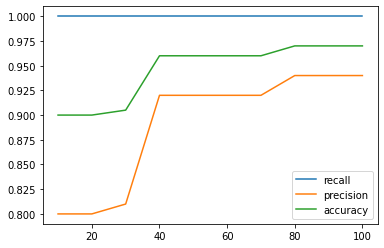

In [44]:
xs, recalls, precs, accuracies = [], [], [], []

for n_estimators in range(10, 101, 10):
    clf = RandomForestClassifier(random_state=42, n_estimators=n_estimators)

    clf.fit(x_train, y_train)
    predicted = clf.predict(x_test)

    xs.append(n_estimators)

    recalls.append(recall_score(predicted, y_test))
    precs.append(precision_score(predicted, y_test))
    accuracies.append(accuracy_score(predicted, y_test))

plt.plot(xs, recalls, label='recall')
plt.plot(xs, precs, label='precision')
plt.plot(xs, accuracies, label='accuracy')

plt.legend()
plt.show()

In [99]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='linear')

svc.fit(x_train, y_train)
predicted = clf.predict(x_test)

print(accuracy_score(predicted, y_test))
print(recall_score(predicted, y_test))
print(precision_score(predicted, y_test))

0.97
1.0
0.94


In [77]:
ransom_combo = pd.concat(
    [
        ransom_train_x,
        ransom_test_x
    ],
    ignore_index=True
)

clean_combo = pd.concat(
    [
        clean_train_x,
        clean_test_x
    ],
    ignore_index=True
)

colors = ['red', 'lime']
labels = ['ransomware', 'goodware']

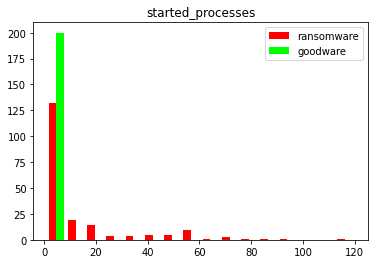

In [95]:
key = keys[8]
bins = 16

plt.hist(
    np.array([
        ransom_combo[key].values,
        clean_combo[key].values,
    ]).T,
    color=colors, label=labels, bins=16)

plt.legend()
plt.title(key)
plt.show()